# Create Potential Fast Transient List

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we make simple cuts on the the time spans, peak magnitudes, amplitudes, rise slopes and rise times.

Write the list of potential fast transients to `potential_fast_transients_list.txt`.

Save the plot of every potential fast transient lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

Import packages.

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

Colors to use for plotting.

In [2]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

Read in nightly-epoch candidate light curves, light curve parameters, and nightly-epoch limiting magnitudes.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )
del fnm

In [5]:
fnm = '../all_nightly_epochs_files/nightly_epoch_magnitude_limits.dat'
neml_field = np.loadtxt(fnm, dtype='str', usecols=(0))
neml_caldate = np.loadtxt(fnm, dtype='str', usecols=(1))
neml_mjd = np.loadtxt(fnm, dtype='float', usecols=(2))
neml_filter = np.loadtxt(fnm, dtype='str', usecols=(3))
neml_nimgs = np.loadtxt(fnm, dtype='int', usecols=(4))
neml_limmag = np.loadtxt(fnm, dtype='float', usecols=(5))
neml_limmage = np.loadtxt(fnm, dtype='float', usecols=(6))
del fnm

## Identify potential fast transients

Based on <a href="https://arxiv.org/abs/1405.3668">Drout et al. (2014)</a>,
a signature of a fast transient is to have a time-above-half-maximum of 12 days or less.

Just start with seeing how many candidates have overall light curve time spans of 10 to 30 days.

A time span of 10 days might still be a bit long, but as the DDF candence was every third
night, this is still only 3 nights of detection which is the absolute lower bound to
photometrically identify the rise-and-fall.

Also impose that the number of epochs be 3 or greater.

In [6]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30))[0]
print(len(tx), len(gtx), len(rtx), len(itx))
del tx, gtx, rtx, itx

221 156 232 221


In order to be sure it is a fast transient and not just the peak of a longer-duration transient
detected only while it is just above our detection limits (i.e., "tip of the iceberg"),
restrict to candidates which reach a peak apparent brightness of 22 mag in any filter,
and have an amplitude of more than 0.5 mag.

In [7]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30) & 
              (paramLC_minmag <= 22.0) & (paramLC_amp >= 0.5))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30) & 
               (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30) & 
               (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30) & 
               (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5))[0]
print(len(tx), len(gtx), len(rtx), len(itx))
del tx, gtx, rtx, itx

71 51 61 43


Fast transients generally have a fast *rise time* of <10 days.
Calculate `trise` the rise times of all transients.

In doing so, also calculate `t0` the MJD of first detection, and
`tpeak` the MJD of the peak brightness.

In cases with multiple matching peak mags, use the first date.

In [8]:
paramLC_t0 = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_g = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_r = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_i = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_g = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_r = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_i = np.zeros(len(paramLC_neps), dtype='float')

for i, cand in enumerate(paramLC_candid):
    tx = np.where(candLC_candid == cand)[0]
    gtx = np.where((candLC_candid == cand) & (candLC_filter == 'g'))[0]
    rtx = np.where((candLC_candid == cand) & (candLC_filter == 'r'))[0]
    itx = np.where((candLC_candid == cand) & (candLC_filter == 'i'))[0]
    
    paramLC_t0[i] = np.min(candLC_mjd[tx])

    ix = np.where(candLC_mag[tx] == paramLC_minmag[i])[0]
    paramLC_tpeak[i] = candLC_mjd[tx[ix[0]]]
    paramLC_trise[i] = paramLC_tpeak[i] - paramLC_t0[i]
    del ix

    if len(gtx) > 0:
        gix = np.where(candLC_mag[gtx] == paramLC_minmag[i])[0]
        if len(gix) > 0:
            paramLC_tpeak_g[i] = candLC_mjd[gtx[gix[0]]]
            paramLC_trise_g[i] = paramLC_tpeak_g[i] - paramLC_t0[i]
        del gix
    if len(rtx) > 0:
        rix = np.where(candLC_mag[rtx] == paramLC_minmag[i])[0]
        if len(rix) > 0:
            paramLC_tpeak_r[i] = candLC_mjd[rtx[rix[0]]]
            paramLC_trise_r[i] = paramLC_tpeak_r[i] - paramLC_t0[i]
        del rix
    if len(itx) > 0:
        iix = np.where(candLC_mag[itx] == paramLC_minmag[i])[0]
        if len(iix) > 0:
            paramLC_tpeak_i[i] = candLC_mjd[itx[iix[0]]]
            paramLC_trise_i[i] = paramLC_tpeak_i[i] - paramLC_t0[i]
        del iix
    
    del tx, gtx, rtx, itx

Now see how many meet the cuts for number of epochs, time span, peak apparent brightness, amplitude, 
*and* have a short rise time.

In [9]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30) 
              & (paramLC_minmag <= 22.0) & (paramLC_amp >= 0.5) 
              & (paramLC_trise > 0.0) & (paramLC_trise <= 10.0))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30) 
               & (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5) 
              & (paramLC_trise_g > 0.0) & (paramLC_trise_g <= 10.0))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30) 
               & (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5) 
              & (paramLC_trise_r > 0.0) & (paramLC_trise_r <= 10.0))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30) 
               & (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5) 
              & (paramLC_trise_i > 0.0) & (paramLC_trise_i <= 10.0))[0]
print(len(tx), len(gtx), len(rtx), len(itx))

del tx, gtx, rtx, itx

30 8 12 5


To make the final list of potential fast transients, impose that the time span, `tspan`, must be
less than 40 days in all filters, but the remaining cuts can be in any filter.

In [10]:
tx = np.where((paramLC_tspan_g <= 30) & (paramLC_tspan_r <= 30) & (paramLC_tspan_i <= 30)
              & (((paramLC_neps_g >= 3) & (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5)
                  & (paramLC_trise_g > 0.0) & (paramLC_trise_g <= 10.0))
                 | ((paramLC_neps_r >= 3) & (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5)
                  & (paramLC_trise_r > 0.0) & (paramLC_trise_r <= 10.0))
                 | ((paramLC_neps_i >= 3) & (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5)
                  & (paramLC_trise_i > 0.0) & (paramLC_trise_i <= 10.0))))[0]
print(len(tx))
pot_FTs = paramLC_candid[tx]
print(pot_FTs)
del tx

21
['DC21bpls' 'DC21bval' 'DC21cgfui' 'DC21cpcjp' 'DC21dpwcq' 'DC21dqpcm'
 'DC21drien' 'DC21homb' 'DC21ifio' 'DC21jfcb' 'DC22eathc' 'DC22eawkf'
 'DC22gtdjg' 'DC22hirtc' 'DC22hvuzr' 'DC22icaog' 'DC22iylyo' 'DC23jjkcv'
 'DC23kvkob' 'DC23lcpnh' 'DC23lfrqm']


Plot light curves for visual review.

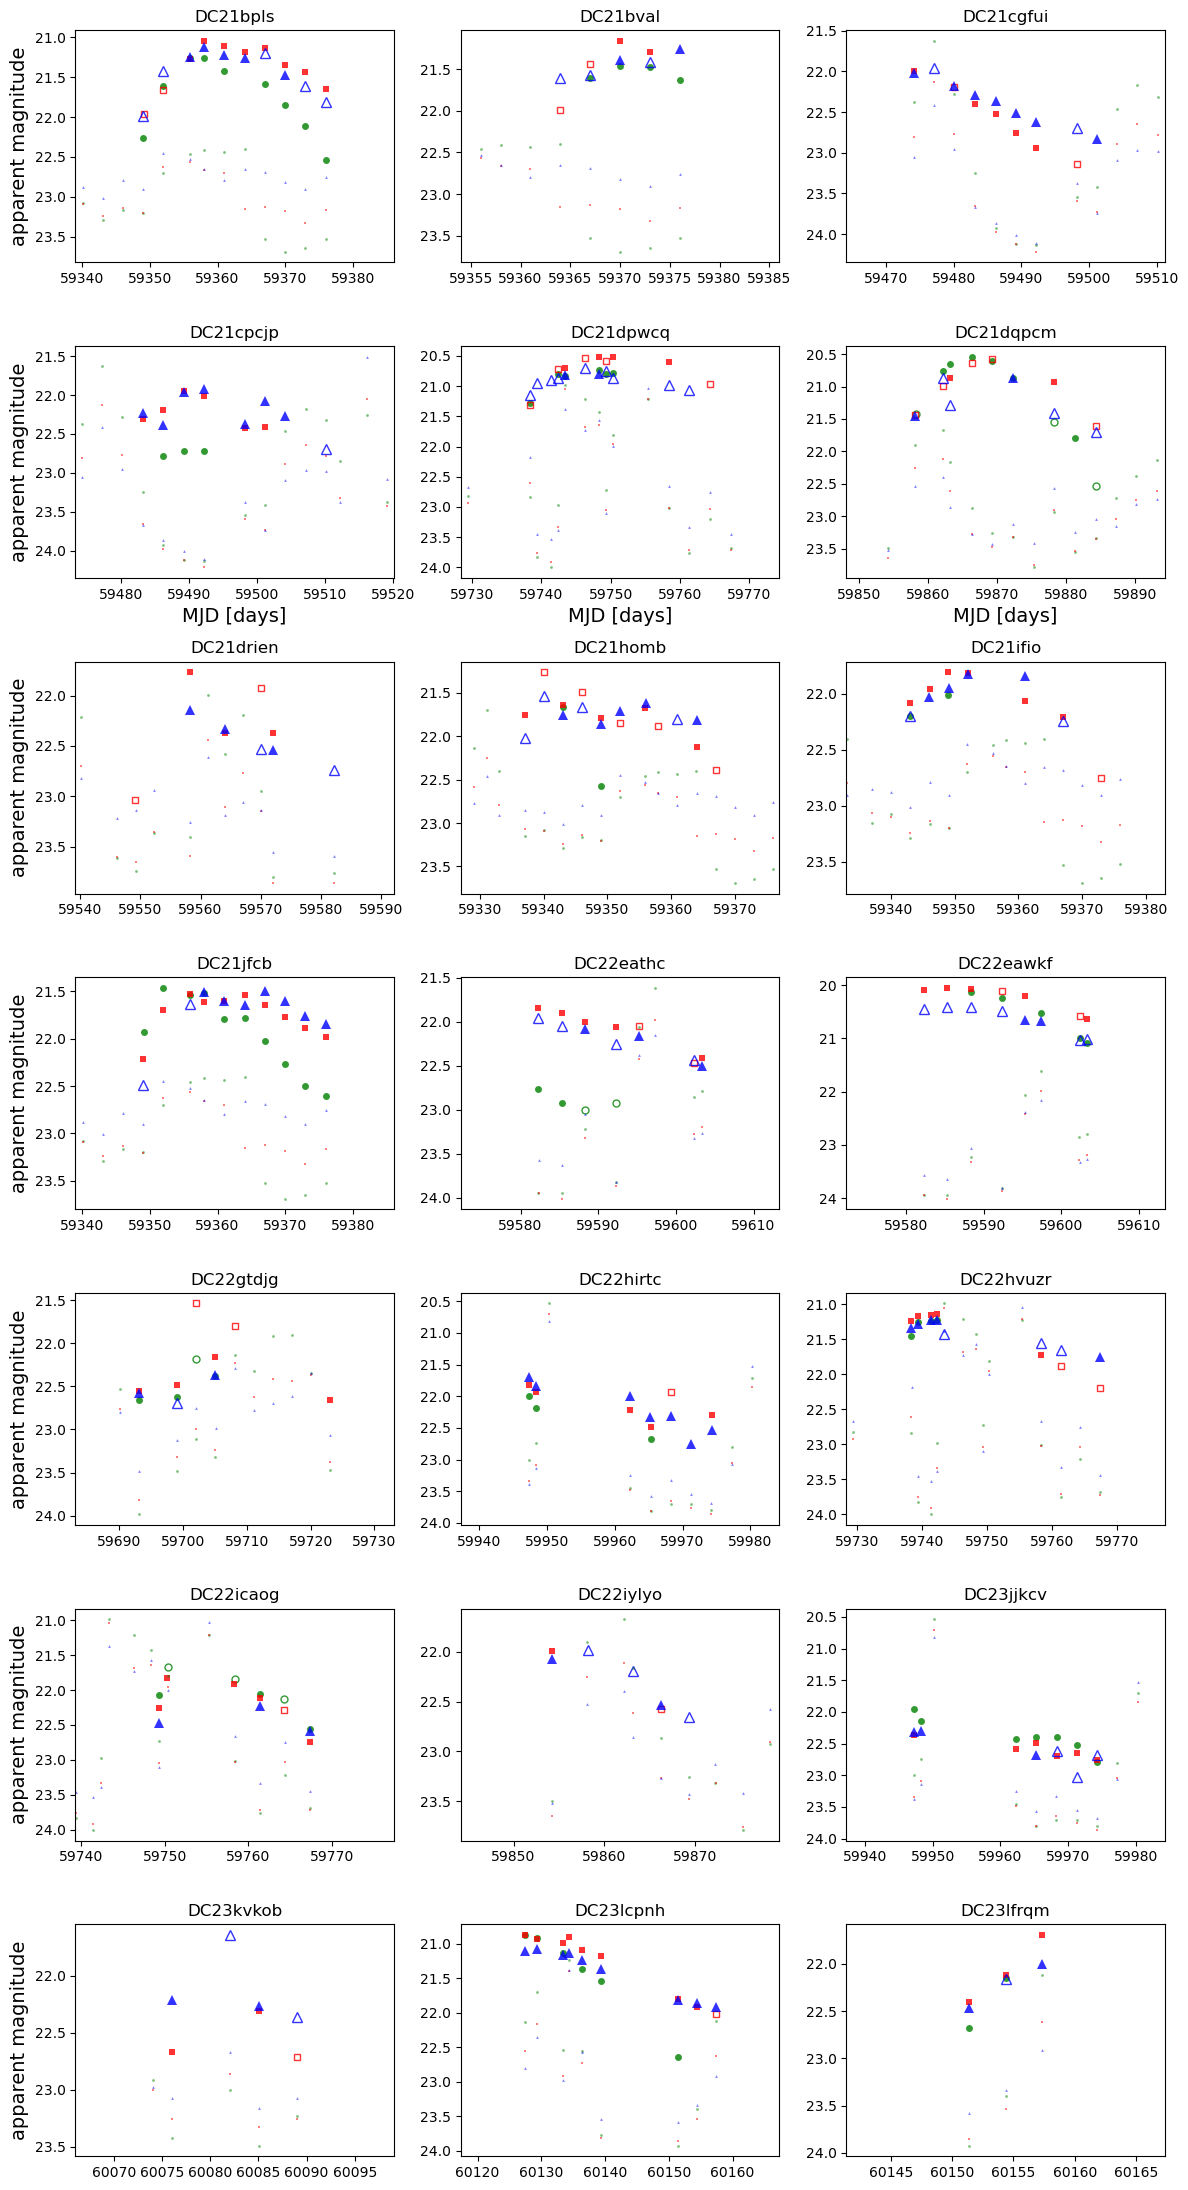

In [17]:
nrow = 7
ncol = 3
fig, ax = plt.subplots( nrow, ncol, figsize=(12, 22), sharex=False, sharey=False )

x = 0
for i in range(nrow):
    ax[i, 0].set_ylabel('apparent magnitude', fontsize=14)
    for j in range(ncol):
        if x < len(pot_FTs):
            cand = pot_FTs[x]

            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0], candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1], candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                # ax[i, j].plot(candLC_mjd[cx2], candLC_mag[cx2], 
                #              all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                del cx0, cx1, cx2

            # cx = np.where(candLC_candid == cand)[0]
            cx = np.where((candLC_candid == cand) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx]) - 10
            xmax = np.max(candLC_mjd[cx]) + 10
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin, xmax])
            ax[i, j].set_title(cand)

            cfield = candLC_field[cx[0]]
            for f,filt in enumerate(all_filters):
                tx = np.where((neml_field == cfield) & (neml_filter == filt)
                              & (neml_mjd > xmin) & (neml_mjd < xmax))[0]
                ax[i, j].plot(neml_mjd[tx], neml_limmag[tx], all_fshapes[f], ms=2, mew=0, alpha=0.5, color=all_fcolors[f])
                del tx

            del cx, xmin, xmax, cfield
            
        x += 1
            
# ax[0, 1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)
for j in range(ncol):
    ax[1, j].set_xlabel('MJD [days]', fontsize=14)

plt.tight_layout()
plt.show()
del nrow, ncol, x

In [ ]:
%%time

# define lists and arrays
gslope = []
rslope = []
islope = []
grise_time = []
rrise_time = []
irise_time = []
gmin_date = np.zeros(len(paramLC_candid))
rmin_date = np.zeros(len(paramLC_candid))
imin_date = np.zeros(len(paramLC_candid))

for i in range(len(paramLC_candid)):
    
    ### g band 
    # retrieve mjd date of the peak magnitude of each candidate in g-band
    gtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
    if len(gtx) > 1: 
        gtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[gtx].min()))[0] 
        gmin_date[i] = candLC_mjd[gtx2][0]
    gtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd <= gmin_date[i]))[0]
    if len(candLC_mag[gtx3]) > 1:
    # calculate rise time and rise slope in g-band
        grise_mag = candLC_mag[gtx3[0]] - candLC_mag[gtx3[-1]] # get change in mag between first detection and peak
        grise_t = candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]] # get change in time between first detection and peak
        grise_time.append(candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]])
        gslope.append(grise_mag/grise_t) # get rise slope
    else:
        grise_mag = -99.0
        grise_time.append(99.0)
        gslope.append(-99.0)
    
    ### r band
    # retrieve mjd date of the peak magnitude of each candidate in r-band
    rtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r')))[0]
    if len(rtx) > 1: 
        rtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mag ==candLC_mag[rtx].min()))[0]
        rmin_date[i] = candLC_mjd[rtx2][0]
    rtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mjd <= rmin_date[i]))[0]
    if len(candLC_mag[rtx3]) > 1:
    # calculate rise time and rise slope in r-band
        rrise_mag = candLC_mag[rtx3[0]] - candLC_mag[rtx3[-1]] # get change in mag between first detection and peak
        rrise_t = candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]] # get change in time between first detection and peak
        rrise_time.append(candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]]) 
        rslope.append(rrise_mag/rrise_t) # get rise slope
    else:
        rrise_mag = -99.0
        rrise_time.append(99.0)
        rslope.append(-99.0)
    
    ### i band
    # retrieve mjd date of the peak magnitude of each candidate in i-band
    itx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i')))[0]
    if len(itx) > 1: 
        itx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mag ==candLC_mag[itx].min()))[0]
        imin_date[i] = candLC_mjd[itx2][0]
    itx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mjd <= imin_date[i]))[0]
    if len(candLC_mag[itx3]) > 1:
    # calculate rise time and rise slope in i-band
        irise_mag = candLC_mag[itx3[0]] - candLC_mag[itx3[-1]] # get change in mag between first detection and peak
        irise_t = candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]] # get change in time between first detection and peak
        irise_time.append(candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]])
        islope.append(irise_mag/irise_t) # get rise slope
    else:
        irise_mag = -99.0
        irise_time.append(99.0)
        islope.append(-99.0)
        
gslope = np.array(gslope)
rslope = np.array(rslope)
islope = np.array(islope)
grise_time = np.array(grise_time)
rrise_time = np.array(rrise_time)
irise_time = np.array(irise_time)

del gtx, gtx2, gtx3, rtx, rtx2, rtx3, itx, itx2,itx3

## Identify potential fast transients
We constrain the timespans, peak magnitudes, amplitudes, rise times, and rise slopes:
 * Short timespan (4 to 40 days) in **every filter**
 * Reaches a peak of at least 22 mag in **any filter**
 * Has an amplitude of at least 0.5 mag in **any filter**
 * Prior to peak, rises in brightness with a slope of at least 1.5 mags/9 days in at least **2 filters**
 * Prior to peak, rises in brightness in less than 10 days in at least **2 filters**

If a candidate satisfies all above constraints, we deem it a potential fast transient.

In [ ]:
# flag which candidates satisfy constraints in at least 2 bands
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]

for t in tx:
    cntr = 0
    if (gslope[t] >= 1.5/9) & (grise_time[t] < 10):
        cntr += 1
    if (rslope[t] >= 1.5/9) & (rrise_time[t] < 10):
        cntr += 1
    if (islope[t] >= 1.5/9) & (irise_time[t] < 10):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potft[t] = 1
    
    del cntr
del tx

tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
del tx
tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
del tx

### Write the list of potential fast transients to file

In [ ]:
fout = open('potential_fast_transients_list.dat', 'w')
tx = np.where(paramLC_potft == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential fast transients: ', len(tx))
del tx

### Plot the potential fast transient lightcurves

DC22icaog shows both a rise and fall, just over two weeks. This looks like a real fast transient.

In [ ]:
sx = np.where(paramLC_potft == 1)[0]
np.random.shuffle(sx)

plt.figure(figsize=(12,7))

s = 0
for i in range(1):
    plt.ylabel('apparent magnitude', fontsize=14)
    for j in range(1):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            if f == 0:
                xmin = 60000.
                xmax = 0.
                if (len(cx0) > 0):
                    xmin = np.min(candLC_mjd[cx0])
                    xmax = np.max(candLC_mjd[cx0])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                    xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
            elif f > 0:
                if (len(cx0) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                
            del cx0, cx1, cx2
        plt.gca().invert_yaxis()
        plt.xlim([xmin-59300.-5, xmax-59300.+5])
        del xmin, xmax
        plt.title(paramLC_candid[sx[s]])
        s += 1

plt.legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    plt.xlabel('MJD-59300 (days)', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

### Plot slope lines for the potential fast transient, DC22icaog, lightcurve

We ensure the calculated rise slope matches the lightcurve data.

In [ ]:
tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
tx2 = np.where((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))

gtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'g'))
rtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'r'))
itx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'i'))

plt.figure(figsize=(10,6))

plt.plot(candLC_mjd[gtx]-59747., candLC_mag[gtx], all_fshapes[0], ms=all_fsizes[0], mew=0, alpha=0.6, color=all_fcolors[0])
plt.plot(candLC_mjd[rtx]-59747., candLC_mag[rtx], all_fshapes[1], ms=all_fsizes[1], mew=0, alpha=0.6, color=all_fcolors[1])
plt.plot(candLC_mjd[itx]-59747., candLC_mag[itx], all_fshapes[2], ms=all_fsizes[2], mew=0, alpha=0.6, colorall_fcolors[2])
del gtx, rtx, itx

x = [1, 2, 3, 4]
gy = [-(gslope[tx][tx2][0]*i)+ 23.2 for i in x]
ry = [-(rslope[tx][tx2][0]*i)+ 23.2 for i in x]
iy = [-(islope[tx][tx2][0]*i)+ 23.2 for i in x]

plt.plot(x, gy, c='green', lw=1, ls='dashed', label =f'g slope={gslope[tx][tx2][0]:.4f}')
plt.plot(x, ry, c='red', lw=1, ls='dotted', label =f'r slope={rslope[tx][tx2][0]:.4f}')
plt.plot(x, iy, c='saddlebrown', lw=1, ls='dashdot', label =f'i slope={islope[tx][tx2][0]:.4f}')
del x, gy, ry, iy, tx, tx2
plt.ylabel('apparent mag')
plt.title('DC22icaog with rise slope')
plt.xlim(0, 23)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

### Save individual plots as PNG files

In [ ]:
sx = np.where(paramLC_potft == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
    cx = np.where(candLC_candid == paramLC_candid[sx[x]])[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    del cx
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    plt.xlabel('MJD-59300 (days)', fontsize=14)
    plt.ylabel('apparent magnitude', fontsize=14)
    plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx